# Time-Ordered Exponential vs Naive Exponential

This notebook illustrates the difference between:

- the **naive** solution \(x(t) = \exp\!\big(\int_0^t A(\tau)\,d\tau\big)x_0\),
  which assumes all \(A(t)\) commute, and
- the **true** solution of \(\dot{x}(t) = A(t)x(t)\), obtained by time-stepping
  with small increments.

We consider a time-dependent rotation matrix
\[
A(t) = 
\begin{bmatrix}
0 & -\omega(t) \\
\omega(t) & 0
\end{bmatrix},
\quad
\omega(t) = 1 + 0.5 \sin t.
\]

Figures are saved into `figs/` for LaTeX inclusion.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)


## Define \(A(t)\) and the True Solution via Time-Stepping

We approximate the time-ordered exponential by small Euler steps:
\[
x_{k+1} \approx x_k + \Delta t\, A(t_k)\, x_k.
\]


In [2]:
def omega(t):
    return 1.0 + 0.5 * np.sin(t)

def A_of_t(t):
    w = omega(t)
    return np.array([[0.0, -w],
                     [w,  0.0]])

# Time grid
t_final = 8.0
dt = 0.001
t_grid = np.arange(0.0, t_final + dt, dt)

# Initial condition
x0 = np.array([1.0, 0.0])

# True solution via forward Euler
x_true = np.zeros((t_grid.size, 2))
x_true[0] = x0.copy()
for k in range(t_grid.size - 1):
    t_k = t_grid[k]
    A_k = A_of_t(t_k)
    x_true[k+1] = x_true[k] + dt * (A_k @ x_true[k])


## Naive Exponential Approximation

If all \(A(t)\) commuted, then \(A(t)\equiv \tilde{A}(t)\) would satisfy
\[
\int_0^t A(\tau)\,d\tau = \bar{A}(t)\, t,
\]
and we could write
\[
x(t) \approx \exp(\bar{A}(t)\,t)\,x_0.
\]

For the example at hand, note that
\[
\int_0^t \omega(\tau)\,d\tau = t - 0.5(\cos t - 1).
\]
We use this scalar integral as if it commuted with everything and build
a naive rotation.


In [3]:
# Naive exponential solution assuming a single effective rotation matrix
def integral_omega(t):
    # Integral of omega(t) = 1 + 0.5 sin t
    # ∫(1 dt) = t,  ∫(0.5 sin t dt) = -0.5 cos t
    return t - 0.5 * (np.cos(t) - 1.0)

theta = integral_omega(t_grid)

# Naive solution: rotate x0 by angle theta(t)
x_naive = np.zeros_like(x_true)
x_naive[:, 0] =  np.cos(theta) * x0[0] - np.sin(theta) * x0[1]
x_naive[:, 1] =  np.sin(theta) * x0[0] + np.cos(theta) * x0[1]


## Compare True and Naive Trajectories

We plot:
- \(x_1(t)\) and \(x_2(t)\) vs time,
- the trajectory in phase space \((x_1, x_2)\).


Saved figure: figs/timeordered_timeseries.png


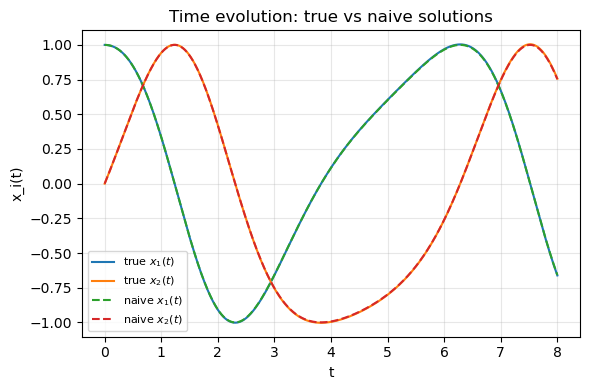

In [4]:
# Time-series comparison
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(t_grid, x_true[:, 0], label="true $x_1(t)$")
ax.plot(t_grid, x_true[:, 1], label="true $x_2(t)$")
ax.plot(t_grid, x_naive[:, 0], "--", label="naive $x_1(t)$")
ax.plot(t_grid, x_naive[:, 1], "--", label="naive $x_2(t)$")

ax.set_xlabel("t")
ax.set_ylabel("x_i(t)")
ax.set_title("Time evolution: true vs naive solutions")
ax.grid(alpha=0.3)
ax.legend(fontsize=8)

fig.tight_layout()
fig_path = os.path.join("figs", "timeordered_timeseries.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()


Saved figure: figs/timeordered_phase_comparison.png


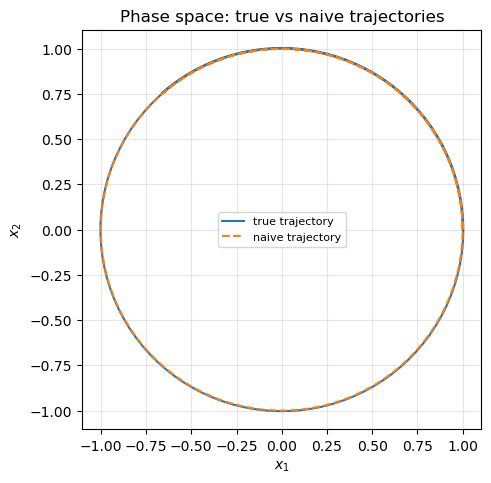

In [5]:
# Phase-space comparison
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x_true[:, 0], x_true[:, 1], label="true trajectory")
ax.plot(x_naive[:, 0], x_naive[:, 1], "--", label="naive trajectory")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Phase space: true vs naive trajectories")
ax.grid(alpha=0.3)
ax.set_aspect("equal", adjustable="box")
ax.legend(fontsize=8)

fig.tight_layout()
fig_path = os.path.join("figs", "timeordered_phase_comparison.png")
fig.savefig(fig_path, dpi=200, bbox_inches="tight")
print("Saved figure:", fig_path)

plt.show()
